<a href="https://colab.research.google.com/github/effat/MLP-Demo/blob/main/CNN_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Libraries**

In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from datetime import datetime
from packaging import version

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorboard
from tensorflow import keras

To ensure we get reproducible results (on your local machine) we set the random seed for Python, Numpy and TensorFlow. This will ensure the SAME random initialization of weight matrices each tiem you execute your code.
In Colab, results might not be reproducable.

In [ ]:
seed=1234
import os
os.environ['PYTHONHASHSEED'] = str(seed)
# For working on GPUs from "TensorFlow Determinism"
os.environ['CUDA_VISBLE_DEVICE'] = ''
import numpy as np
np.random.seed(seed)
import random
random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)


# **Import Dataset, Print Dimesion, and Visualize Inputs**

In [ ]:

(train_images_all, train_labels_all), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images_all.shape

(60000, 28, 28)

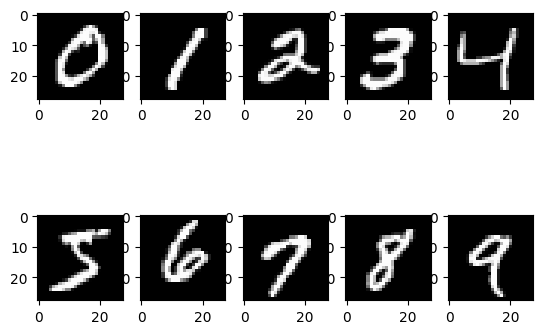

In [ ]:
fig, ax = plt.subplots(2,5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(train_labels_all == i)[0]
    plottable_image = np.reshape(train_images_all[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray')

# **Normalize Input**

We have to "Normalize" to scale the features. Pixel values range from 0 to 255.

MNIST dataset feature description:
https://keras.io/api/datasets/mnist/


In [ ]:
train_images = train_images_all / 255.0
test_images = test_images/255.0

# **Split the Dataset**

 Training and Validation Set split.

 20% of the training data is used as validation set. Note, here the input data is training set: which is split into the training and the validation set.

In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels_all, test_size=0.2, random_state=32)

In [ ]:
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)

(48000, 28, 28)
(12000, 28, 28)
(10000, 28, 28)


# **Reshape for CNN**

In [ ]:
x_train = train_images.reshape(-1, 28, 28, 1) #add an additional dimension to represent the single-channel
x_test = test_images.reshape(-1, 28, 28, 1)
x_val = val_images.reshape(-1, 28, 28, 1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


# **Defining the Model**
1. First we will add convolution layers

2. Next, we will flatten the input.

3. Finally, an output layer which will transform it into a 10 dimensional vector. As we have ten digits, 0 - 9, so need our output to be 10 dimensions (num_classes).

The prepare_model() method constructs the model.

In [ ]:

from tensorflow.keras.models import Sequential # Changed tf.keras.models to tensorflow.keras.models
from tensorflow.keras.layers import Dense # Changed tf.keras.layers to tensorflow.keras.layers



def prepare_model():
  cnn_model = tf.keras.models.Sequential()
  # padding: string, either "valid" or "same" (case-insensitive). "valid" means no padding.
  #"same" results in padding evenly to the left/right or up/down of the input.
  # When padding="same" and strides=1, the output has the same size as the input.
  cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))


  cnn_model.add(tf.keras.layers.Flatten())
  cnn_model.add(tf.keras.layers.Dense(256))
  cnn_model.add(tf.keras.layers.Activation('relu'))
  cnn_model.add(tf.keras.layers.Dense(10))
  cnn_model.add(tf.keras.layers.Activation('softmax'))

  cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_model.build(input_shape=(1,28,28,1))
  #cnn_model.summary()

  print(cnn_model.summary())

  return cnn_model




In [ ]:
my_model = prepare_model()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (1, 28, 28, 32)             │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (1, 14, 14, 32)             │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (1, 7, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (1, 7, 7, 64)               │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (1, 4, 4, 64)               │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (1, 2, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (1, 2, 2, 128)              │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (1, 1, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (1, 1, 1, 128)              │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (1, 128)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1, 256)                    │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (1, 256)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 10)                     │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (1, 10)                     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,026 (1.23 MB)

 Trainable params: 322,026 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

None


# **Add a Weight Decay Regularizer**

Weight Decay Regularizer documentation: https://keras.io/api/layers/regularizers/


In [ ]:

#cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3),  kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding='same', activation='relu'))

In [ ]:
##

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

### captures the training and validation loss in each epoch. This will be used to plot and visualize
history = my_model.fit(x_train, train_labels, validation_data=(x_val, val_labels), batch_size= 512, epochs= 2, callbacks=[tensorboard_callback])



Epoch 1/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 64s 652ms/step - accuracy: 0.5226 - loss: 1.4251 - val_accuracy: 0.9160 - val_loss: 0.2704
Epoch 2/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 90s 744ms/step - accuracy: 0.9364 - loss: 0.2090 - val_accuracy: 0.9610 - val_loss: 0.1315


# **Plot Training and Validation Loss**
Can be used to monitor model tarining and detect overfitting/underfitting.

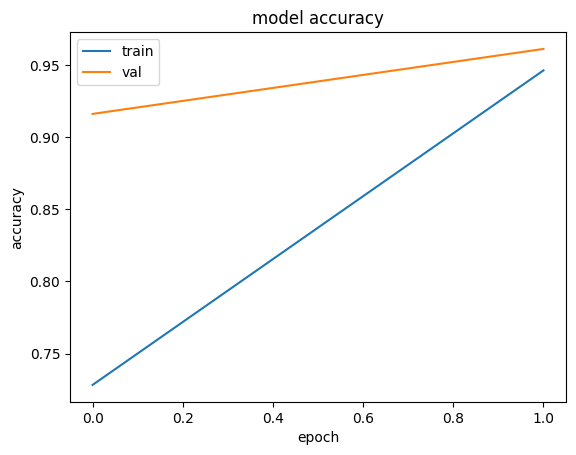

In [ ]:
#Plot history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Test Error**

In [ ]:
from sklearn import metrics
# Evaluate
score = my_model.evaluate(x_test, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9550 - loss: 0.1402
Test loss: 0.11835911870002747
Test accuracy: 0.9624999761581421
